<a href="https://colab.research.google.com/github/thuanyvermelho/ProjetosDIO---Cientista-de-Dados/blob/Projeto-1/Trabalhando_biblioteca_pandas_e_analises_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [6]:
df = pd.concat([df1, df2, df3, df4, df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.dtypes #verificando o tipo de cada coluna

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
df.describe

<bound method NDFrame.describe of        Cidade       Data  Vendas  LojaID  Qtde
0     Aracaju 2018-01-01  142.00    1520     1
1     Aracaju 2018-01-01   14.21    1522     6
2     Aracaju 2018-01-01   71.55    1520     1
3     Aracaju 2018-01-01    3.01    1521     7
4     Aracaju 2018-01-01   24.51    1522     8
..        ...        ...     ...     ...   ...
235  Salvador 2019-01-03   41.84    1034     1
236  Salvador 2019-01-03  126.29    1035     3
237  Salvador 2019-01-03   38.06    1036     3
238  Salvador 2019-01-03  139.64    1035     1
239  Salvador 2019-01-03  161.41    1037     3

[894 rows x 5 columns]>

In [11]:
#alterando o tipo de dado de cada coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [14]:
#tratando valores faltantes - consultando linhas
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [16]:
#apagando  as linhas com valores nulos
df.dropna(inplace=True)

In [17]:
#apagando  as linhas com valores nulos apenas uma coluna
df.dropna(subset=['Vendas'],inplace=True)

In [18]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all' , inplace=True)

In [19]:
#criando colunas novas

In [20]:
#criando colunas de receita - mul(multiplicação)

df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
#criando nova coluna e descobrindo q quantidade vendida de cada
df['Receita/Vendas'] = df['Receita']/ df['Vendas']

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [24]:
#retornando a maior receita
df['Receita'].max()

3544.0

In [25]:
#retornando a menor receita
df['Receita'].min()

3.34

In [26]:
#nlargest
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [27]:
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [28]:
#agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [29]:
#ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **TRABALHANDO COM CONJUNTO DE DATAS**

In [30]:
#trabalhando a coluna de data um tipo inteiro
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [31]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [32]:
#transformando a coluna de data em DATA
df['Data'] = pd.to_datetime(df['Data'])

In [33]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [34]:
#agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [35]:
#criando uma nova coluna com ano
df['Ano de Venda'] = df['Data'].dt.year


In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano de Venda
24,Recife,2019-01-01,13.00,983,2,26.00,2.0,2019
120,Salvador,2019-03-02,140.17,1036,2,280.34,2.0,2019
38,Fortaleza,2019-01-01,35.09,1004,4,140.36,4.0,2019
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,4.0,2019
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019


In [37]:
#extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)


In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano de Venda,mes_venda,dia_venda
24,Aracaju,2018-01-01,151.04,1522,6,906.24,6.0,2018,1,1
97,Recife,2019-01-01,153.04,983,4,612.16,4.0,2019,1,1
54,Natal,2018-10-03,373.00,852,4,1492.00,4.0,2018,10,3
218,Salvador,2019-01-02,189.12,1036,3,567.36,3.0,2019,1,2
147,Salvador,2019-01-02,34.50,1035,1,34.50,1.0,2019,1,2


In [39]:
#retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [40]:
#calculando a diferença de dias
df['diferença_dias'] = df['Data'] - df['Data'].min()

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano de Venda,mes_venda,dia_venda,diferença_dias
188,Natal,2019-01-02,178.11,1035,3,534.33,3.0,2019,1,2,366 days
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,8,27,238 days
94,Recife,2019-01-01,24.70,982,3,74.10,3.0,2019,1,1,365 days
30,Aracaju,2018-01-01,119.21,1520,8,953.68,8.0,2018,1,1,0 days
172,Natal,2019-01-02,6.70,1035,1,6.70,1.0,2019,1,2,366 days


In [42]:
#criando a coluna de trimestre
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano de Venda,mes_venda,dia_venda,diferença_dias,Trimestre_Venda
33,Recife,2019-01-01,32.33,982,1,32.33,1.0,2019,1,1,365 days,1
39,Natal,2019-01-10,504.00,854,3,1512.00,3.0,2019,1,10,374 days,1
56,Aracaju,2018-01-01,41.90,1523,6,251.40,6.0,2018,1,1,0 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
113,Natal,2019-01-02,18.90,1034,3,56.70,3.0,2019,1,2,366 days,1


In [44]:
#filtrando as vendas de 2019 do mês de março 
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month ==3)]

In [45]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano de Venda,mes_venda,dia_venda,diferença_dias,Trimestre_Venda
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.0,2019,3,2,425 days,1
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,20,443 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,4.0,2019,3,24,447 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019,3,24,447 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,1.0,2019,3,2,425 days,1


# **VISUALIZAÇÃO DE DADOS COM GRÁFICOS**

In [46]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

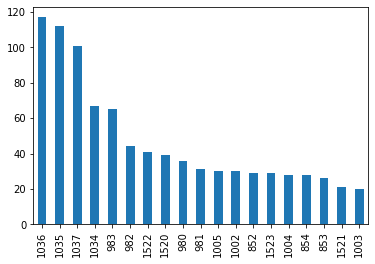

In [47]:
#grafico barras - ascending - do maior para o menor
df['LojaID'].value_counts(ascending=False).plot.bar()

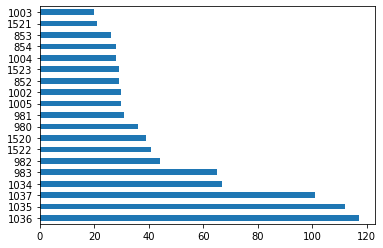

In [48]:
#grafico barras horizontal
df['LojaID'].value_counts().plot.barh();

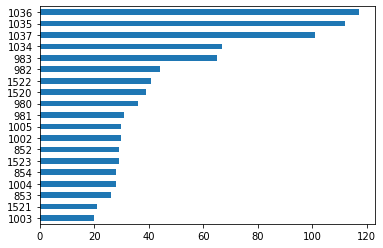

In [49]:
#grafico barras - ascending - do maior para o menor
df['LojaID'].value_counts(ascending=True).plot.barh();

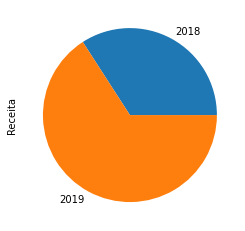

In [50]:
#gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [51]:
#total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

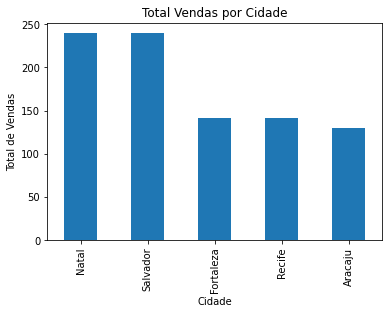

In [52]:
#adicionando titulos e alterando nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

Text(0, 0.5, 'Total de Vendas')

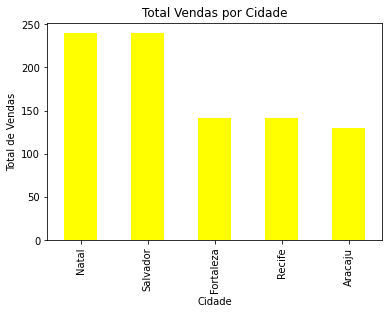

In [53]:
# alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color='yellow')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

In [54]:
#alterando o estilo
plt.style.use('ggplot')

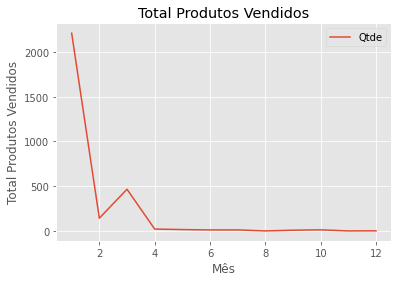

In [55]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos Vendidos')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [56]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [57]:
#selecionando apenas as vendas de 2019
df_2019 = df[df['Ano de Venda'] == 2019]

In [58]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

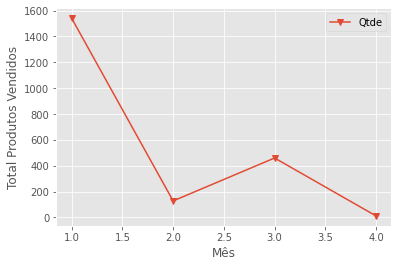

In [59]:
#total produtos vendidos por mes
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

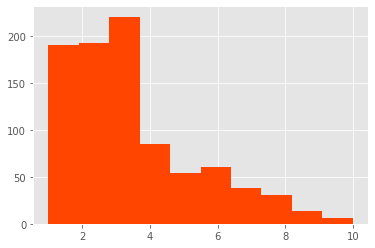

In [60]:
#histograma
plt.hist(df['Qtde'], color='orangered');

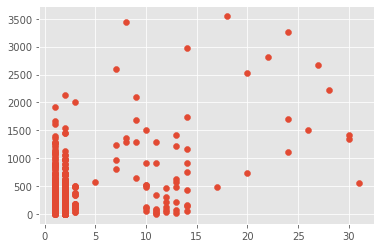

In [61]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

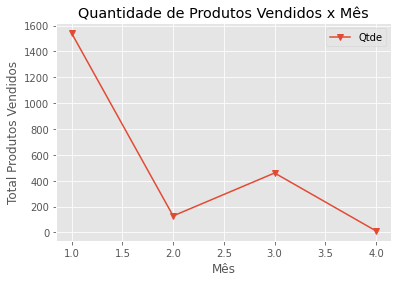

In [62]:
#salvando as png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de Produtos Vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('Graficos QTDE x Mês')